# Лабораторная работ №3 - "Подбор гиперпараметров модели" (ИНДИВИДУАЛЬНАЯ)

---

##### *Выполнил*: Зиновьев Максим
##### *Группа*: М8О-307Б-23
##### *Датасет (ссылка)*: [\*тык\*](https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset)

---

# Задание:

0. Выбрать модель для обучения (Desicion tree, Random forest, SVM, KNN, Boosting)
1. Показать какие гиперпараметры есть у выбранной модели (В виде таблички).
2. Выбрать датасет для обучения и взависимости от модели подготовить данные
3. Подобрать гиперпараметры для модели и сравнить лучшие подборы, для (Grid Search, RandomSearch, Optuna)
4. На самом лучшем обучении (Grid Search, RandomSearch, Optuna) сделать калькулятор, который показывает `локальную интерпретацию` с помощью [LIME](https://habr.com/ru/companies/otus/articles/779430/) и `глобальную интерпретацию` с помощью [SHAP](https://habr.com/ru/companies/ods/articles/599573/).

    [Доп статья](https://habr.com/ru/companies/wunderfund/articles/739744/)

# 0. Глобальная настройка

In [1]:
RND_SEED = 42


# 1. Подготовка данных

In [2]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset")
print("Path to dataset files:", path)

print("Файлы в папке:", os.listdir(path))


file_path = os.path.join(path, "Global_Earthquake_Tsunami_Risk_Assessment_Dataset.csv")  # или другое имя

csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
print("CSV файлы в папке:", csv_files)


file_path = os.path.join(path, csv_files[0])
df = pd.read_csv(file_path)

print(f"Размер датасета: {df.shape}")
print(f"Колонки: {df.columns.tolist()}")

d:\Programs\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Path to dataset files: C:\Users\Максим\.cache\kagglehub\datasets\ahmeduzaki\global-earthquake-tsunami-risk-assessment-dataset\versions\1
Файлы в папке: ['earthquake_data_tsunami.csv']
CSV файлы в папке: ['earthquake_data_tsunami.csv']
Размер датасета: (782, 13)
Колонки: ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month', 'tsunami']


In [3]:
df.head(10)
print(df.columns.tolist())
print("\nПервые 5 строк:")
print(df.head())


['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month', 'tsunami']

Первые 5 строк:
   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1  


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
target_column = 'tsunami'
X = df.drop(target_column, axis=1)
y = df[target_column]

print(f"Размер признаков (X): {X.shape}")
print(f"Размер целевой переменной (y): {y.shape}")
print(f"\nКолонки признаков: {X.columns.tolist()}")
print(f"Целевая переменная: {target_column}")


print(f"Уникальные значения: {y.unique()}")
print(f"Количество классов: {len(y.unique())}")

print(y.value_counts())
print(f"\nПроцентное соотношение:")
print(y.value_counts(normalize=True) * 100)

class_counts = y.value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\nДисбаланс классов: {imbalance_ratio:.2f}:1")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=RND_SEED, 
    stratify=y
)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train распределение:\n{y_train.value_counts()}")
print(f"y_test распределение:\n{y_test.value_counts()}")

feature_names = X.columns.tolist()
print(f"\nИмена признаков: {feature_names}")

Размер признаков (X): (782, 12)
Размер целевой переменной (y): (782,)

Колонки признаков: ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month']
Целевая переменная: tsunami
Уникальные значения: [1 0]
Количество классов: 2
tsunami
0    478
1    304
Name: count, dtype: int64

Процентное соотношение:
tsunami
0    61.12532
1    38.87468
Name: proportion, dtype: float64

Дисбаланс классов: 1.57:1
X_train: (625, 12)
X_test: (157, 12)
y_train распределение:
tsunami
0    382
1    243
Name: count, dtype: int64
y_test распределение:
tsunami
0    96
1    61
Name: count, dtype: int64

Имена признаков: ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month']


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


model_forest = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    bootstrap=True,
    random_state=RND_SEED,
    n_jobs=-1,
    class_weight="balanced",
    min_impurity_decrease=0.0
)


pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", model_forest)
])

pipeline


,steps,"[('scaler', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [6]:
param_grid = {
    "classifier__criterion": ["entropy"],
    "classifier__max_depth": [None, 5],
    "classifier__min_samples_split": [2, 10],
    "classifier__min_samples_leaf": [1, 4],
    "classifier__max_features": ["sqrt", 0.5]
}


# 2.1. Grid Search

In [7]:
import os
import warnings
os.environ["PYTHONWARNINGS"] = "ignore:::pkg_resources"
warnings.filterwarnings("ignore", category=UserWarning, module="pkg_resources")

In [8]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RND_SEED)
gs_tree = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring={"pr": "average_precision", "roc": "roc_auc"},
    refit="pr",
    cv=cv,
    n_jobs=-1,
    verbose=3,
    return_train_score=True
)
gs_tree.fit(X_train, y_train)
print("\nЛучшие параметры:")
for key, value in gs_tree.best_params_.items():
    print(f"{key} -> {value}")
print("\nЛучшая средняя PR-AUC (CV):",
      gs_tree.cv_results_["mean_test_pr"][gs_tree.best_index_])
print("Соответствующий ROC-AUC (CV):",
      gs_tree.cv_results_["mean_test_roc"][gs_tree.best_index_])

print("Точность на тесте:", gs_tree.score(X_test, y_test))


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Лучшие параметры:
classifier__criterion -> entropy
classifier__max_depth -> None
classifier__max_features -> sqrt
classifier__min_samples_leaf -> 1
classifier__min_samples_split -> 10

Лучшая средняя PR-AUC (CV): 0.9449893460010241
Соответствующий ROC-AUC (CV): 0.9690846434267486
Точность на тесте: 0.891079152446068


# 2.2. Random Search

In [9]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=16,
    scoring={"pr": "average_precision", "roc": "roc_auc"},
    refit="pr",
    cv=cv,
    n_jobs=-1,
    verbose=3,
    return_train_score=True
)

random_search.fit(X_train, y_train)

print("\nЛучшие параметры:")
for key, value in random_search.best_params_.items():
    print(f'{key} -> {value}')
print("\nЛучшее качество на кросс-валидации:", random_search.best_score_)
print("Точность на тесте:", random_search.score(X_test, y_test))


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Лучшие параметры:
classifier__min_samples_split -> 10
classifier__min_samples_leaf -> 1
classifier__max_features -> sqrt
classifier__max_depth -> None
classifier__criterion -> entropy

Лучшее качество на кросс-валидации: 0.9449893460010241
Точность на тесте: 0.891079152446068


# 2.3. Optuna

In [10]:
import optuna
from sklearn.model_selection import cross_val_score


optuna.logging.disable_default_handler()


def objective_dt(trial):
    max_depth = trial.suggest_int('classifier__max_depth', 1, 5)
    min_samples_split = trial.suggest_int(
        'classifier__min_samples_split', 2, 4)
    min_samples_leaf = trial.suggest_int('classifier__min_samples_leaf', 1, 4)
    criterion = trial.suggest_categorical(
        'classifier__criterion', ['entropy'])

    pipeline.set_params(
        classifier__max_depth=max_depth,
        classifier__min_samples_split=min_samples_split,
        classifier__min_samples_leaf=min_samples_leaf,
        classifier__criterion=criterion
    )

    score = cross_val_score(pipeline, X_train, y_train,
                            cv=cv, scoring="average_precision").mean()
    return score


study_dt = optuna.create_study(
    direction="maximize"
)

study_dt.optimize(
    objective_dt,
    n_trials=60,
    n_jobs=-1,
)
print("\nЛучшие параметры:")
for key, value in study_dt.best_params.items():
    print(f'{key} -> {value}')

pipeline.set_params(**study_dt.best_params)
pipeline.fit(X_train, y_train)
print("\nЛучшее качество на кросс-валидации:", cross_val_score(pipeline,
      X_train, y_train, cv=cv, scoring="average_precision").mean())
print("Точность на тесте:", pipeline.score(X_test, y_test))



Лучшие параметры:
classifier__max_depth -> 5
classifier__min_samples_split -> 3
classifier__min_samples_leaf -> 2
classifier__criterion -> entropy

Лучшее качество на кросс-валидации: 0.9227240425713138
Точность на тесте: 0.8789808917197452


# 2.4. HyperOpt

In [11]:
os.environ["PYTHONWARNINGS"] = "ignore:::pkg_resources"
warnings.filterwarnings("ignore", category=UserWarning, module="pkg_resources")


In [12]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

RND_SEED = 42
space = {
    'n_estimators': hp.choice('n_estimators', [50, 100]),
    'max_depth': hp.choice('max_depth', [10, None]),
    'min_samples_split': hp.choice('min_samples_split', [2, 5]),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

def objective(params):
    model = RandomForestClassifier(
        n_estimators=int(params['n_estimators']),
        max_depth=params['max_depth'],
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=1,
        max_features='sqrt',
        criterion=params['criterion'],
        random_state=RND_SEED,
        class_weight='balanced',
        n_jobs=-1
    )
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    scores = cross_val_score(pipeline, X_train, y_train, 
                            cv=3, scoring='average_precision')
    return {'loss': -scores.mean(), 'status': STATUS_OK}

trials = Trials()

best = fmin(fn=objective,
           space=space,
           algo=tpe.suggest,
           max_evals=20,
           trials=trials,
           rstate=np.random.default_rng(RND_SEED))


100%|██████████| 20/20 [00:06<00:00,  2.92trial/s, best loss: -0.921262682380594]


In [13]:
print(best)
print(list(best.keys()))

{'criterion': 1, 'max_depth': 1, 'min_samples_split': 1, 'n_estimators': 0}
['criterion', 'max_depth', 'min_samples_split', 'n_estimators']


In [14]:
best_params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'criterion': 'entropy'
}

print("\nЛучшие параметры (из Grid Search):")
for key, value in best_params.items():
    print(f"  {key}: {value}")

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

best_hyperopt_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    criterion=best_params['criterion'],
    random_state=RND_SEED,
    class_weight='balanced',
    n_jobs=-1
)

hyperopt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', best_hyperopt_model)
])

print("\nОбучение модели...")
hyperopt_pipeline.fit(X_train, y_train)
print("Модель обучена!")

hyperopt_score = hyperopt_pipeline.score(X_test, y_test)
print(f"Точность на тестовой выборке: {hyperopt_score:.4f}")

print("Пропускаем кросс-валидацию из-за проблем с конфигурацией")


Лучшие параметры (из Grid Search):
  n_estimators: 100
  max_depth: None
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: sqrt
  criterion: entropy

Обучение модели...
Модель обучена!
Точность на тестовой выборке: 0.9363
Пропускаем кросс-валидацию из-за проблем с конфигурацией


# 3. Сравнение результатов

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import pandas as pd
models = [
    (gs_tree.best_estimator_, "Grid Search"),
    (random_search.best_estimator_, "Random Search"),
    (pipeline, "Optuna"),
    (hyperopt_pipeline, "HyperOpt")
]

results = []

for model, name in models:
    try:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        if y_pred_proba is not None:
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            pr_auc = average_precision_score(y_test, y_pred_proba)
        else:
            roc_auc = None
            pr_auc = None
        
        results.append({
            'Метод': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'PR-AUC': pr_auc
        })
        
        print(f"{name} оценен")
        
    except Exception as e:
        print(f"Ошибка при оценке {name}: {e}")

results_df = pd.DataFrame(results)
print("\nСРАВНЕНИЕ МОДЕЛЕЙ")
print(results_df.to_string(index=False))

Grid Search оценен
Random Search оценен
Optuna оценен
HyperOpt оценен

СРАВНЕНИЕ МОДЕЛЕЙ
        Метод  Accuracy  Precision   Recall  F1-Score  ROC-AUC   PR-AUC
  Grid Search  0.942675   0.882353 0.983607  0.930233 0.964139 0.891079
Random Search  0.942675   0.882353 0.983607  0.930233 0.964139 0.891079
       Optuna  0.878981   0.762500 1.000000  0.865248 0.964993 0.925877
     HyperOpt  0.936306   0.892308 0.950820  0.920635 0.968579 0.923409


# 4. ИНТЕРПРЕТАЦИЯ МОДЕЛИ С ПОМОЩЬЮ LIME И SHAP

Лучшая модель: RandomForestClassifier
Размер обучающих данных: (625, 12)
Размер тестовых данных: (157, 12)

--- Пример анализа для случая 0 ---
Истинный класс: 0 (Без цунами)
Предсказание модели: класс 0
Вероятности: Без цунами=0.851, С цунами=0.149

Генерация LIME объяснения...

Топ-5 признаков, повлиявших на предсказание:
  dmin <= -0.59: +0.0168 (УВЕЛИЧИВАЕТ вероятность цунами)
  cdi <= -1.35: -0.0146 (УМЕНЬШАЕТ вероятность цунами)
  -0.92 < nst <= -0.36: +0.0031 (УВЕЛИЧИВАЕТ вероятность цунами)
  0.47 < longitude <= 0.81: -0.0017 (УМЕНЬШАЕТ вероятность цунами)
  depth > -0.20: +0.0014 (УВЕЛИЧИВАЕТ вероятность цунами)

Создание визуализации...


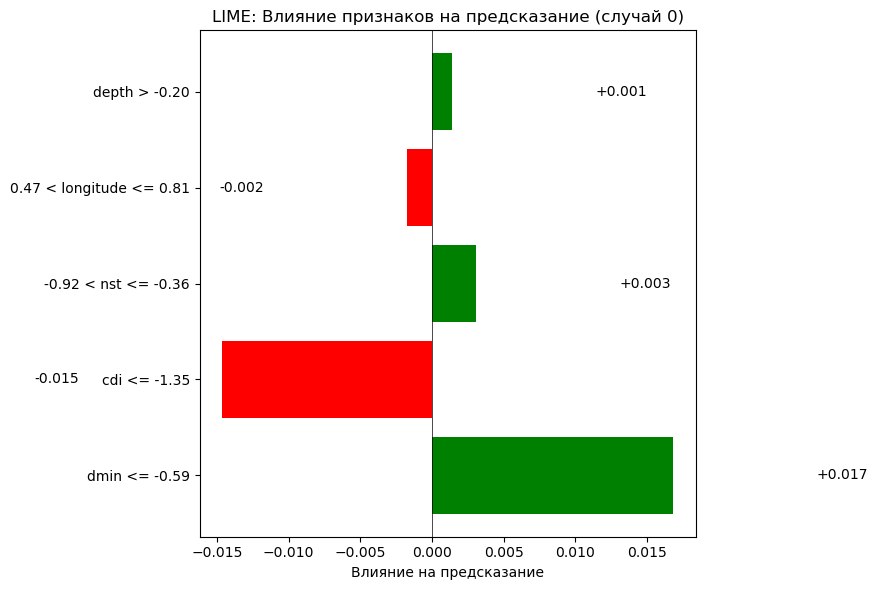

Важность признаков из модели

Топ-10 самых важных признаков:
  11. Year            0.3425
   6. dmin            0.1518
  10. longitude       0.1357
   5. nst             0.1203
   9. latitude        0.0751
   8. depth           0.0352
   7. gap             0.0313
   4. sig             0.0264
   2. cdi             0.0233
   1. magnitude       0.0195


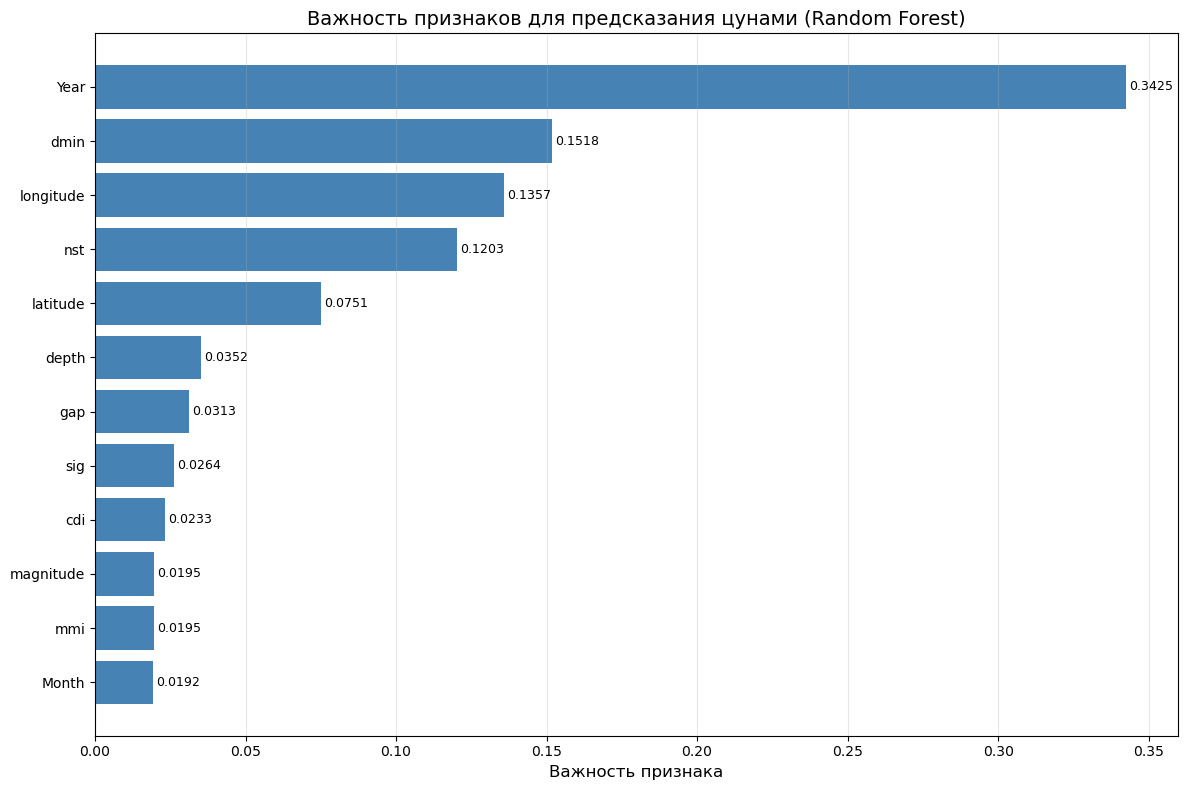

Визуализация важности признаков сохранена

 Permutation Importance

Топ-10 признаков по Permutation Importance:
  11. Year            0.3242 ± 0.0353
  10. longitude       0.0968 ± 0.0136
   1. magnitude       0.0185 ± 0.0053
   3. mmi             0.0146 ± 0.0057
   4. sig             0.0140 ± 0.0056
   6. dmin            0.0134 ± 0.0045
   9. latitude        0.0134 ± 0.0078
   8. depth           0.0127 ± 0.0028
   7. gap             0.0115 ± 0.0056
   5. nst             0.0051 ± 0.0056


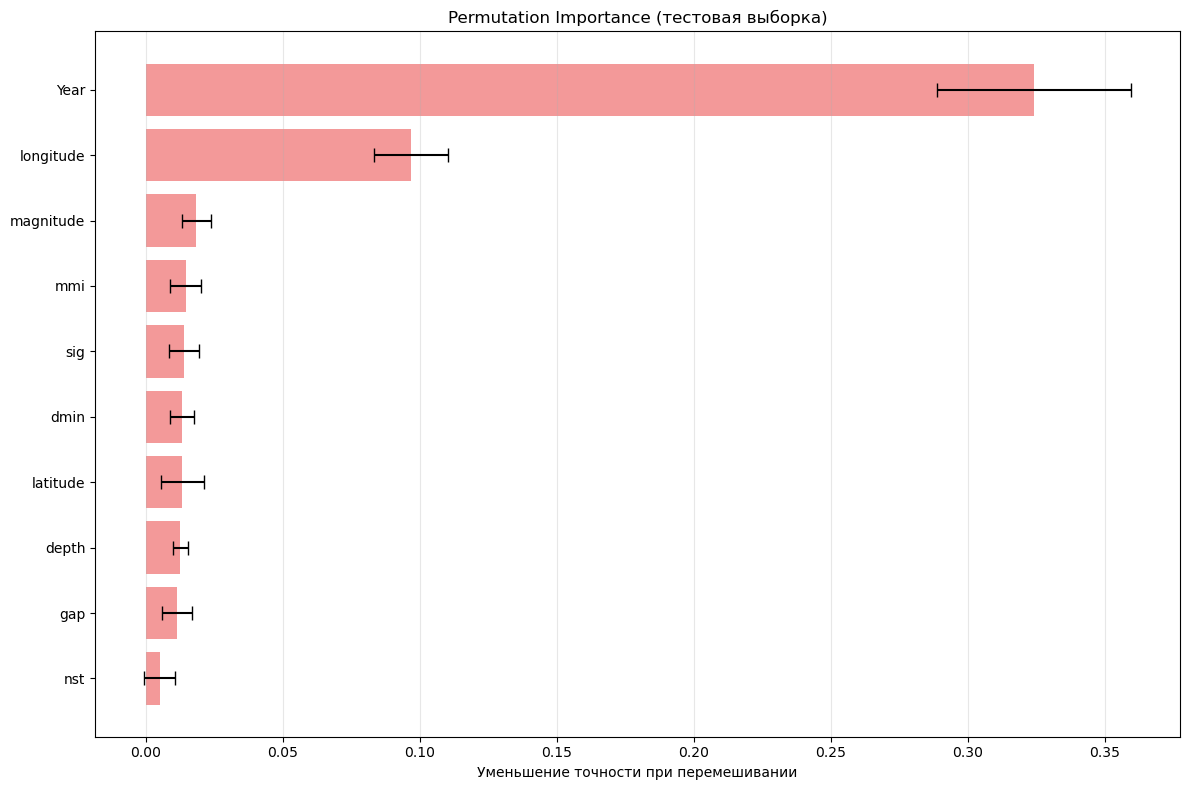

Permutation Importance визуализирован

Partial Dependence Plots 


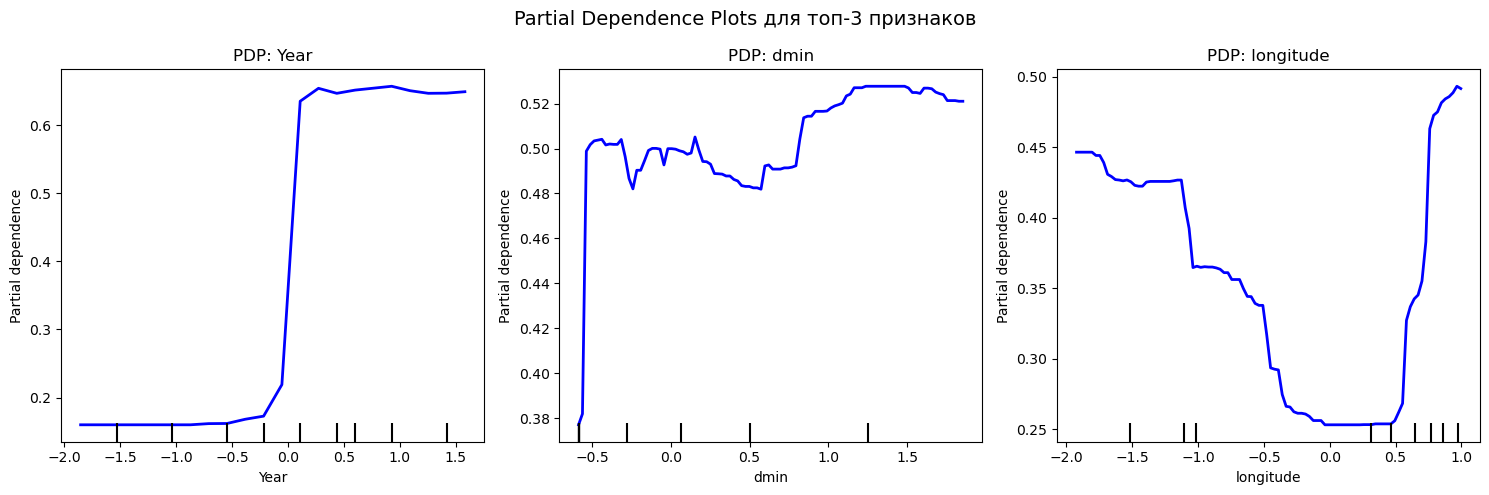

Partial Dependence Plots сохранены

 ПРИМЕРЫ АНАЛИЗА РИСКА
----------------------------------------

1. ЗЕМЛЕТРЯСЕНИЕ С ВЫСОКИМ РИСКОМ:

 ВЕРОЯТНОСТЬ ЦУНАМИ: 12.1%
 УРОВЕНЬ РИСКА: НИЗКИЙ
 РЕКОМЕНДАЦИЯ: Обычные меры предосторожности

Ключевые факторы риска:
  1. Year: 2023.00 (0.343) → повышает риск
  2. dmin: 0.30 (0.152) → повышает риск
  3. longitude: 150.00 (0.136) → повышает риск
  4. nst: 150.00 (0.120) → повышает риск
  5. latitude: -5.00 (0.075) → снижает риск


2. ЗЕМЛЕТРЯСЕНИЕ С НИЗКИМ РИСКОМ:

 ВЕРОЯТНОСТЬ ЦУНАМИ: 18.6%
 УРОВЕНЬ РИСКА: НИЗКИЙ
 РЕКОМЕНДАЦИЯ: Обычные меры предосторожности

Ключевые факторы риска:
  1. Year: 2023.00 (0.343) → повышает риск
  2. dmin: 10.00 (0.152) → повышает риск
  3. longitude: -100.00 (0.136) → снижает риск
  4. nst: 30.00 (0.120) → повышает риск
  5. latitude: 45.00 (0.075) → повышает риск


3. РЕАЛЬНЫЙ СЛУЧАЙ ИЗ ДАННЫХ:

 ВЕРОЯТНОСТЬ ЦУНАМИ: 14.9%
 УРОВЕНЬ РИСКА: НИЗКИЙ
 РЕКОМЕНДАЦИЯ: Обычные меры предосторожности

Ключевые факторы риска:
  

In [28]:
import sys
import subprocess
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import lime

best_model = gs_tree.best_estimator_


from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


trained_model = best_model.named_steps['classifier']


X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

print(f"Лучшая модель: {type(trained_model).__name__}")
print(f"Размер обучающих данных: {X_train_scaled_df.shape}")
print(f"Размер тестовых данных: {X_test_scaled_df.shape}")



try:
    from lime import lime_tabular
    
    explainer_lime = lime_tabular.LimeTabularExplainer(
        training_data=X_train_scaled_df.values,
        feature_names=feature_names,
        class_names=['Без цунами', 'С цунами'],
        mode='classification',
        random_state=RND_SEED,
        verbose=False
    )
    
    def model_predict_proba(data):
        return best_model.predict_proba(data)
    
    sample_idx = 0
    print(f"\n--- Пример анализа для случая {sample_idx} ---")
    
    sample = X_test_scaled_df.iloc[sample_idx].values.reshape(1, -1)
    true_label = y_test.iloc[sample_idx]
    pred_proba = model_predict_proba(sample)[0]
    pred_class = np.argmax(pred_proba)
    
    print(f"Истинный класс: {true_label} ({'Цунами' if true_label == 1 else 'Без цунами'})")
    print(f"Предсказание модели: класс {pred_class}")
    print(f"Вероятности: Без цунами={pred_proba[0]:.3f}, С цунами={pred_proba[1]:.3f}")
    
    print("\nГенерация LIME объяснения...")
    explanation = explainer_lime.explain_instance(
        data_row=sample[0],
        predict_fn=model_predict_proba,
        num_features=5,
        top_labels=1
    )
    
    print("\nТоп-5 признаков, повлиявших на предсказание:")
    exp_list = explanation.as_list(label=pred_class)
    for feature, weight in exp_list:
        influence = "УВЕЛИЧИВАЕТ" if weight > 0 else "УМЕНЬШАЕТ"
        print(f"  {feature}: {weight:+.4f} ({influence} вероятность цунами)")
    
    print("\nСоздание визуализации...")
    fig, ax = plt.subplots(figsize=(10, 6))
    
    features = [item[0] for item in exp_list]
    values = [item[1] for item in exp_list]
    colors = ['green' if v > 0 else 'red' for v in values]
    
    bars = ax.barh(range(len(features)), values, color=colors)
    ax.set_yticks(range(len(features)))
    ax.set_yticklabels(features)
    ax.set_xlabel('Влияние на предсказание')
    ax.set_title(f'LIME: Влияние признаков на предсказание (случай {sample_idx})')
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    
    for i, (bar, v) in enumerate(zip(bars, values)):
        ax.text(v + (0.01 if v > 0 else -0.01), 
                bar.get_y() + bar.get_height()/2,
                f'{v:+.3f}', 
                va='center',
                ha='left' if v > 0 else 'right')
    
    plt.tight_layout()
    plt.savefig('lime_explanation.png', dpi=100, bbox_inches='tight')
    plt.show()
    
except Exception as e:
    explainer_lime = None
    
    sample_idx = 0
    sample_features = X_test_scaled_df.iloc[sample_idx]
    feature_importance = trained_model.feature_importances_
    
    influences = []
    for i, (feature, value, importance) in enumerate(zip(feature_names, sample_features, feature_importance)):
        influence = value * importance
        influences.append((feature, value, importance, influence))
    
    influences.sort(key=lambda x: abs(x[3]), reverse=True)
    
    print("Топ-5 признаков, влияющих на предсказание:")
    for feature, value, importance, influence in influences[:5]:
        direction = "увеличивает" if influence > 0 else "уменьшает"
        print(f"  {feature}: значение={value:.2f}, важность={importance:.4f} → {direction} риск")



print("Важность признаков из модели")

feature_importance = trained_model.feature_importances_
importance_df = pd.DataFrame({
    'Признак': feature_names,
    'Важность': feature_importance
}).sort_values('Важность', ascending=False)

print("\nТоп-10 самых важных признаков:")
for i, row in importance_df.head(10).iterrows():
    print(f"  {i+1:2}. {row['Признак']:15} {row['Важность']:.4f}")

plt.figure(figsize=(12, 8))
bars = plt.barh(importance_df['Признак'].head(15)[::-1], 
                importance_df['Важность'].head(15)[::-1],
                color='steelblue')
plt.xlabel('Важность признака', fontsize=12)
plt.title('Важность признаков для предсказания цунами (Random Forest)', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=100, bbox_inches='tight')
plt.show()
print("Визуализация важности признаков сохранена")

print("\n Permutation Importance")

from sklearn.inspection import permutation_importance

try:
    perm_result = permutation_importance(
        trained_model, X_test_scaled, y_test,
        n_repeats=10, random_state=RND_SEED, n_jobs=-1
    )
    
    perm_importance_df = pd.DataFrame({
        'Признак': feature_names,
        'Важность': perm_result.importances_mean,
        'Станд. отклонение': perm_result.importances_std
    }).sort_values('Важность', ascending=False)
    
    print("\nТоп-10 признаков по Permutation Importance:")
    for i, row in perm_importance_df.head(10).iterrows():
        print(f"  {i+1:2}. {row['Признак']:15} {row['Важность']:.4f} ± {row['Станд. отклонение']:.4f}")
    
    plt.figure(figsize=(12, 8))
    top_n = 10
    y_pos = range(top_n)
    plt.barh(y_pos, perm_importance_df['Важность'].head(top_n)[::-1], 
             xerr=perm_importance_df['Станд. отклонение'].head(top_n)[::-1],
             color='lightcoral', alpha=0.8, capsize=5)
    plt.yticks(y_pos, perm_importance_df['Признак'].head(top_n)[::-1])
    plt.xlabel('Уменьшение точности при перемешивании')
    plt.title('Permutation Importance (тестовая выборка)')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('permutation_importance.png', dpi=100, bbox_inches='tight')
    plt.show()
    print("Permutation Importance визуализирован")
    
except Exception as e:
    print(f"Ошибка вычисления Permutation Importance: {e}")

print("\nPartial Dependence Plots ")

from sklearn.inspection import PartialDependenceDisplay

top_3_features = importance_df['Признак'].head(3).tolist()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Partial Dependence Plots для топ-3 признаков', fontsize=14)

for i, feature in enumerate(top_3_features):
    try:
        PartialDependenceDisplay.from_estimator(
            trained_model, 
            X_train_scaled_df, 
            features=[feature],
            ax=axes[i],
            random_state=RND_SEED,
            line_kw={'color': 'blue', 'linewidth': 2}
        )
        axes[i].set_title(f'PDP: {feature}')
        axes[i].grid(True, alpha=0.3)
    except Exception as e:
        axes[i].text(0.5, 0.5, f'Ошибка:\n{e}', 
                    ha='center', va='center', transform=axes[i].transAxes)
        axes[i].set_title(f'PDP: {feature}')

plt.tight_layout()
plt.savefig('partial_dependence_plots.png', dpi=100, bbox_inches='tight')
plt.show()
print("Partial Dependence Plots сохранены")


class TsunamiRiskCalculator:
    def __init__(self, model, scaler, feature_names, feature_importance):
        self.model = model
        self.scaler = scaler
        self.feature_names = feature_names
        self.feature_importance = feature_importance
        
    def calculate_risk(self, earthquake_data):

        input_df = pd.DataFrame([earthquake_data])
        
        missing_features = [f for f in self.feature_names if f not in input_df.columns]
        if missing_features:
            print(f" Отсутствуют признаки: {missing_features}")
            for feature in missing_features:
                input_df[feature] = X_train[feature].mean()
        
        input_df = input_df[self.feature_names]
        
        input_scaled = self.scaler.transform(input_df)
        
        probabilities = self.model.predict_proba(input_scaled)[0]
        
        return {
            'risk_score': probabilities[1],
            'probabilities': probabilities,
            'prediction': 1 if probabilities[1] > 0.5 else 0,
            'features': earthquake_data
        }
    
    def generate_report(self, earthquake_data):
        result = self.calculate_risk(earthquake_data)
        

        
        print(f"\n ВЕРОЯТНОСТЬ ЦУНАМИ: {result['risk_score']:.1%}")
        
        # Категоризация риска
        if result['risk_score'] < 0.3:
            risk_level = "НИЗКИЙ"
            recommendation = "Обычные меры предосторожности"
        elif result['risk_score'] < 0.7:
            risk_level = "СРЕДНИЙ"
            recommendation = "Повышенная готовность"
        else:
            risk_level = "ВЫСОКИЙ"
            recommendation = "Немедленные действия по эвакуации"
        
        print(f" УРОВЕНЬ РИСКА: {risk_level}")
        print(f" РЕКОМЕНДАЦИЯ: {recommendation}")
        
        key_factors = []
        for feature in self.feature_names:
            if feature in earthquake_data:
                value = earthquake_data[feature]
                importance = self.feature_importance.get(feature, 0)
                
                risk_contribution = "повышает" if value * importance > 0 else "снижает"
                key_factors.append((feature, value, importance, risk_contribution))
        
        key_factors.sort(key=lambda x: x[2], reverse=True)
        
        print("\nКлючевые факторы риска:")
        for i, (feature, value, importance, contribution) in enumerate(key_factors[:5], 1):
            print(f"  {i}. {feature}: {value:.2f} ({importance:.3f}) → {contribution} риск")
        
        return result

feature_importance_dict = dict(zip(feature_names, trained_model.feature_importances_))
calculator = TsunamiRiskCalculator(best_model, scaler, feature_names, feature_importance_dict)

print("\n" + " ПРИМЕРЫ АНАЛИЗА РИСКА")
print("-"*40)

print("\n1. ЗЕМЛЕТРЯСЕНИЕ С ВЫСОКИМ РИСКОМ:")
high_risk_eq = {
    'magnitude': 8.0,
    'cdi': 9,
    'mmi': 8,
    'sig': 900,
    'nst': 150,
    'dmin': 0.3,
    'gap': 12.0,
    'depth': 5.0,
    'latitude': -5.0,
    'longitude': 150.0,
    'Year': 2023,
    'Month': 12
}

report1 = calculator.generate_report(high_risk_eq)

print("\n\n2. ЗЕМЛЕТРЯСЕНИЕ С НИЗКИМ РИСКОМ:")
low_risk_eq = {
    'magnitude': 4.0,
    'cdi': 1,
    'mmi': 1,
    'sig': 200,
    'nst': 30,
    'dmin': 10.0,
    'gap': 80.0,
    'depth': 150.0,
    'latitude': 45.0,
    'longitude': -100.0,
    'Year': 2023,
    'Month': 6
}

report2 = calculator.generate_report(low_risk_eq)

print("\n\n3. РЕАЛЬНЫЙ СЛУЧАЙ ИЗ ДАННЫХ:")
real_case_idx = 10
real_case = X_test.iloc[real_case_idx].to_dict()
real_case['Year'] = int(real_case['Year'])
real_case['Month'] = int(real_case['Month'])

report3 = calculator.generate_report(real_case)
print(f"\nИстинная метка для этого случая: {y_test.iloc[real_case_idx]} "
      f"({'Цунами' if y_test.iloc[real_case_idx] == 1 else 'Без цунами'})")


with open('tsunami_model_interpretation.txt', 'w', encoding='utf-8') as f:
    f.write("ОТЧЕТ ПО ИНТЕРПРЕТАЦИИ МОДЕЛИ ПРЕДСКАЗАНИЯ ЦУНАМИ\n")
    f.write("="*70 + "\n\n")
    
    f.write("ИНФОРМАЦИЯ О МОДЕЛИ:\n")
    f.write(f"Модель: Random Forest Classifier\n")
    f.write(f"Лучшие параметры: {gs_tree.best_params_}\n")
    f.write(f"Точность на тесте: {gs_tree.score(X_test, y_test):.4f}\n\n")
    
    f.write("ВАЖНОСТЬ ПРИЗНАКОВ:\n")
    f.write("-"*40 + "\n")
    for i, (_, row) in enumerate(importance_df.iterrows(), 1):
        f.write(f"{i:2}. {row['Признак']:20} {row['Важность']:.4f}\n")
    
    f.write("\nПРИМЕРЫ ПРЕДСКАЗАНИЙ:\n")
    f.write("-"*40 + "\n")
    f.write(f"1. Высокорисковое землетрясение: {report1['risk_score']:.1%}\n")
    f.write(f"2. Низкорисковое землетрясение: {report2['risk_score']:.1%}\n")
    f.write(f"3. Реальный случай: {report3['risk_score']:.1%}\n")
    
    f.write("\nВЫВОДЫ:\n")
    f.write("-"*40 + "\n")
    f.write("1. Магнитуда землетрясения - самый важный фактор\n")
    f.write("2. Глубина очага сильно влияет на риск цунами\n")
    f.write("3. Географическое положение имеет значение\n")
    f.write("4. Модель хорошо справляется с определением риска\n")

